<a href="https://colab.research.google.com/github/ghoreishi/SDF/blob/main/SDF_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

150


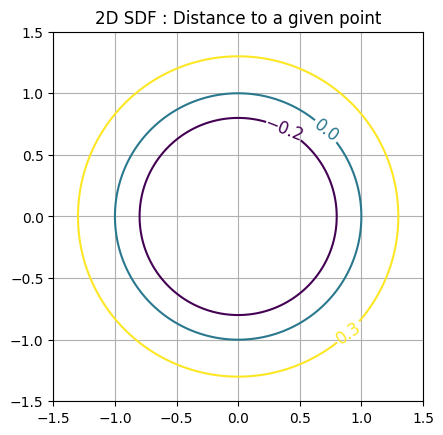

In [2]:
# Program to plot a Circle
# using Center-Radius form of circle equation

import numpy as np
import matplotlib.pyplot as plt
figure, axes = plt.subplots()

x = np.linspace( -1.5 , 1.5 , 150 )
y = np.linspace( -1.5 , 1.5 , 150 )

a, b = np.meshgrid( x , y )

C = np.sqrt(a ** 2 + b ** 2) - 1
print(len(a))

CS = axes.contour( a , b , C, [-0.2,0,0.3] )
axes.clabel(CS, inline=True, fontsize=12)
axes.set_aspect( 1 )
axes.grid()

plt.title( '2D SDF : Distance to a given point' )
plt.show()


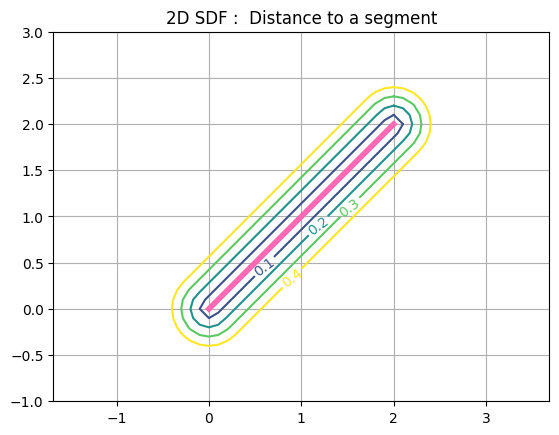

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([0, 0])
B = np.array([2, 2])
x = np.arange(-1, 3.1, 0.1)
y = np.arange(-1, 3.1, 0.1)
X, Y = np.meshgrid(x, y)
BmA = B - A
den = np.dot(BmA, BmA)
d = np.zeros_like(X)
for i in range(X.size):
    P = np.array([X.flat[i], Y.flat[i]])
    lamb = np.dot(P - A, BmA) / den
    lambt = min(1, max(0, lamb))
    Q = A + lambt * BmA
    d.flat[i] = np.linalg.norm(P - Q)
dValues = [0, 0.1, 0.2, 0.3, 0.4]

x_line = np.array([0, 2])
y_line = np.array([0, 2])

plt.figure()
CS = plt.contour(X, Y, d, dValues)
plt.clabel(CS, inline=True, fontsize=10)
plt.plot(x_line, y_line, color = 'hotpink', linewidth = '4')
plt.grid(True)

plt.axis('equal')

plt.title( '2D SDF : Distance to a segment' )
plt.show()

In [ ]:
!git clone https://github.com/fogleman/sdf.git
!apt-get install virtualenv
!virtualenv sdf/env
!. sdf/env/local/bin/activate
!pip install -e sdf/.
import sys
sys.path.append('/content/sdf')

Cloning into 'sdf'...
remote: Enumerating objects: 861, done.
remote: Counting objects: 100% (848/848), done.
remote: Compressing objects: 100% (410/410), done.
remote: Total 861 (delta 449), reused 817 (delta 432), pack-reused 13
Receiving objects: 100% (861/861), 8.26 MiB | 24.37 MiB/s, done.
Resolving deltas: 100% (449/449), done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-distlib python3-filelock python3-pip python3-pip-whl python3-platformdirs
  python3-setuptools python3-setuptools-whl python3-virtualenv python3-wheel python3-wheel-whl
Suggested packages:
  python-setuptools-doc python2-pip-whl python2-setuptools-whl
The following NEW packages will be installed:
  python3-distlib python3-filelock python3-pip python3-pip-whl python3-platformdirs
  python3-setuptools python3-setuptools-whl python3-virtualenv python3-wheel python3-wheel-whl
  virtualenv
0 upgraded, 11

In [ ]:
from sdf import *

f = sphere(1) & box(1.5)

c = cylinder(0.5)
f -= c.orient(X) | c.orient(Y) | c.orient(Z)

f.save('out.stl')

min -0.84543, -0.84543, -0.84543
max 0.845431, 0.845431, 0.845431
step 0.0104847, 0.0104847, 0.0104847
4657463 samples in 216 batches with 2 workers

44 skipped, 60 empty, 112 nonempty
291028 triangles in 4.03063 seconds


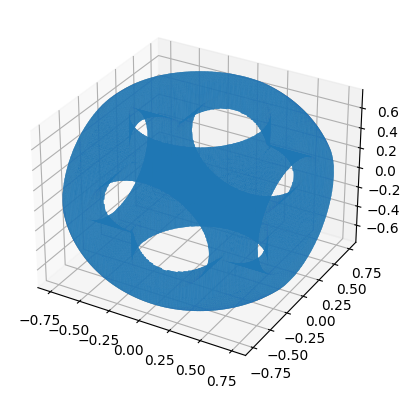

In [ ]:
!pip install numpy-stl
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('out.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()